In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("placementdata.csv")

In [61]:
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [63]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [65]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']
Numerical columns : ['StudentID', 'CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']


In [67]:
df[cat_col].nunique()

ExtracurricularActivities    2
PlacementTraining            2
PlacementStatus              2
dtype: int64

In [69]:
df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [19]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


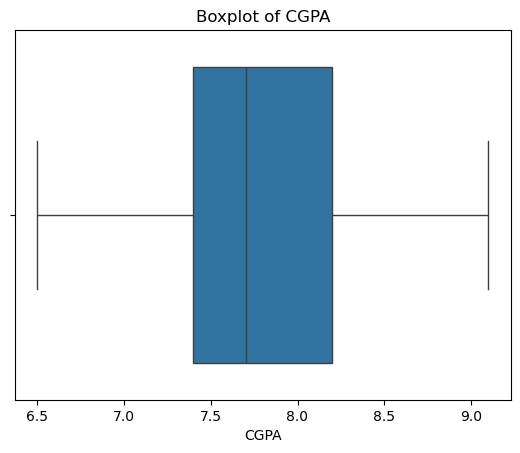

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['CGPA'])
plt.title("Boxplot of CGPA")
plt.show()

In [73]:
Q1 = df['CGPA'].quantile(0.25)
Q3 = df['CGPA'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['CGPA'] < (Q1 - 1.5 * IQR)) | (df['CGPA'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in CGPA: {len(outliers)}")

Number of outliers in CGPA: 0


In [75]:
from scipy.stats import zscore

df['z_score'] = zscore(df['CGPA'])
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print(f"Outliers (Z-score): {len(outliers)}")

Outliers (Z-score): 0


In [27]:
#there is no outliers.The dataset was checked for outliers using Boxplots, IQR method, and Z-score analysis. No significant outliers were detected, indicating a clean and balanced dataset suitable for machine learning applications."

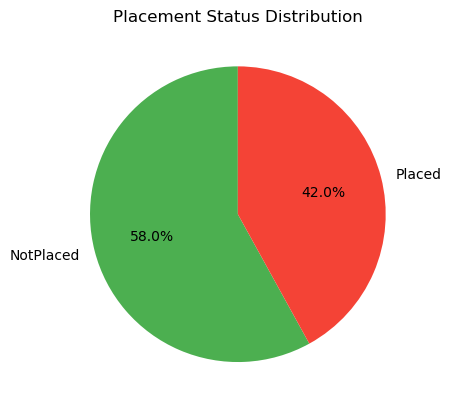

In [77]:
#data visulisation
import matplotlib.pyplot as plt
#1. Pie Chart – Placement Status Distribution
df['PlacementStatus'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#F44336'])
plt.title("Placement Status Distribution")
plt.ylabel('')
plt.show()

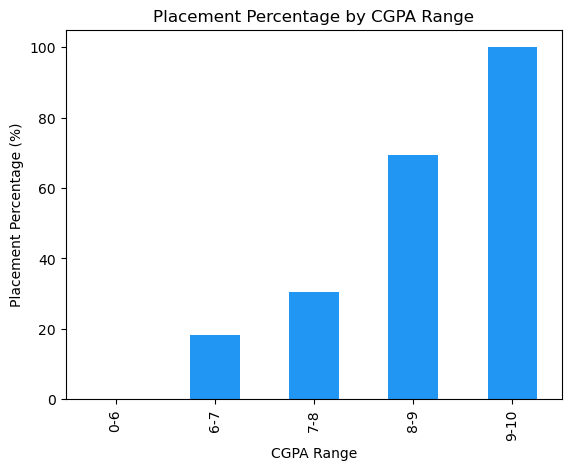

In [79]:
df['PlacementStatus_num'] = df['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})
df['CGPA_Range'] = pd.cut(df['CGPA'], bins=[0,6,7,8,9,10], labels=['0-6','6-7','7-8','8-9','9-10'])
cgpa_plot = df.groupby('CGPA_Range')['PlacementStatus_num'].mean() * 100
cgpa_plot.plot(kind='bar', color='#2196F3')
plt.title("Placement Percentage by CGPA Range")
plt.ylabel("Placement Percentage (%)")
plt.xlabel("CGPA Range")
plt.show()


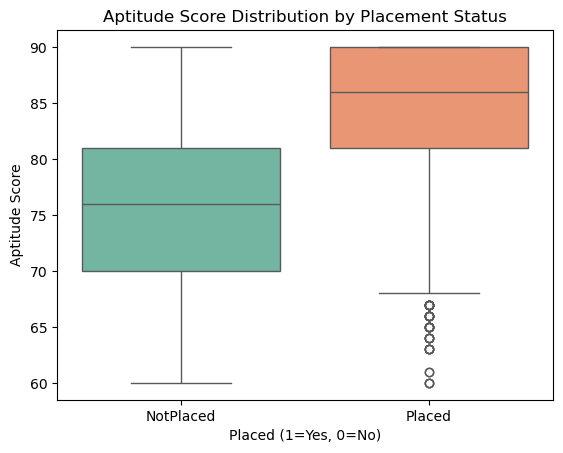

In [57]:
import seaborn as sns

sns.boxplot(x='PlacementStatus', y='AptitudeTestScore', data=df, palette='Set2',legend=False)
plt.title("Aptitude Score Distribution by Placement Status")
plt.xlabel("Placed (1=Yes, 0=No)")
plt.ylabel("Aptitude Score")
plt.show()


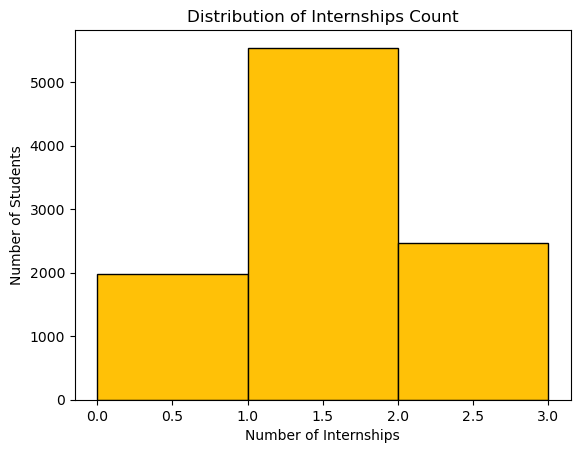

In [81]:
plt.hist(df['Internships'], bins=range(0, df['Internships'].max()+2), color='#FFC107', edgecolor='black')
plt.title("Distribution of Internships Count")
plt.xlabel("Number of Internships")
plt.ylabel("Number of Students")
plt.show()


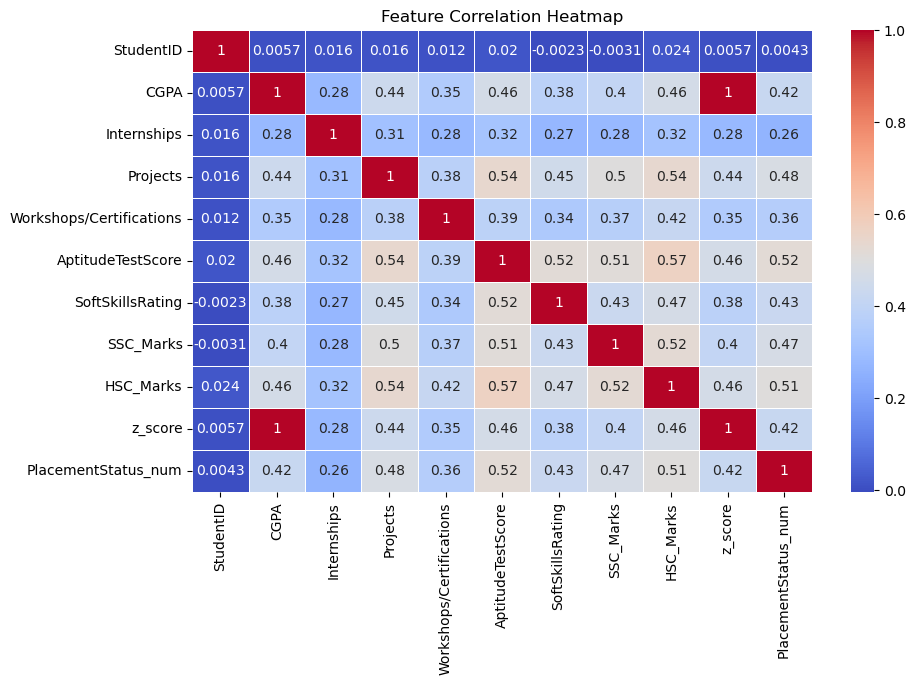

In [51]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['number']).corr()  # ✅ Select only numeric columns
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()